In [1]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf,pacf

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('/Users/Phoenix/iCloud Drive/Documents/2017 Fall/STA 237/Project/')

In [3]:
img=nib.load('Dallas/sub04288/func/rest.nii')

In [4]:
img.shape

(64, 64, 36, 115)

In [5]:
data=img.get_data()
data=np.array(data)

In [6]:
data.shape

(64, 64, 36, 115)

In [7]:
n=data.shape[3]

In [8]:
def series(data,x,y,z):
    T=data[x,y,z,:]
    plt.figure(figsize=(15,5))
    plt.plot(T)
    plt.show()

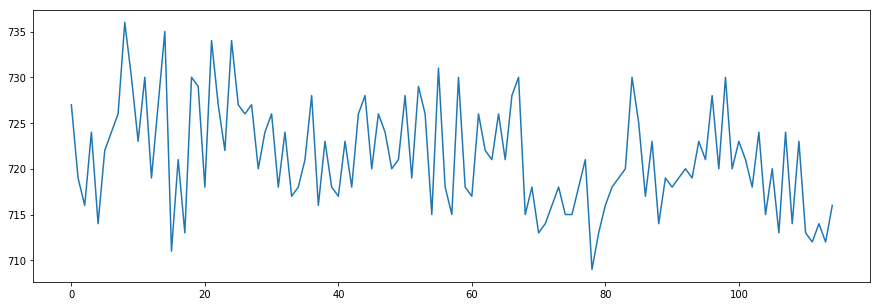

In [38]:
series(data,18,18,18)

In [11]:
def design1(n,k):
    X=np.zeros((n,k+1))
    X[:,1]=range(n)
    for i in range(k+1):
        X[:,i]=X[:,1]**i
    return X
X=design1(n,4)
X.shape

(115, 5)

In [12]:
def clean_trend1(X,y):
    Model=LinearRegression()
    Model.fit(X,y)
    z=Model.predict(X)
    return(y-z)

In [13]:
def clean_trend2(X,width,n):
    m=np.zeros(n)
    for i in range(width,n-width):
        m[i]=np.mean(X[range(i-width,i+width+1)])
    for i in range(width):
        m[i]=(np.sum(X[:(i+width+1)])+(width-i)*X[0])/(2*width+1)
    for i in range(n-width,n):
        m[i]=(np.sum(X[(i-width):])+(width-n+i+1)*X[n-1])/(2*width+1)
    return (X-m)

In [14]:
def clean_period(x,y,z,n,k):
    T=data[x,y,z,:]
    X=design(n,k)
    z=trend(X,T)
    plt.plot(range(n),z)
    plt.show()

In [35]:
def test(d):
    x=18
    y=18
    z=18
    d=d
    width=1
    n=115
    k=3
    T=data[x,y,z,:]
    S=np.zeros(d)
    m=np.zeros(n)
    if d%2==1:
        q=int((d-1)/2)
        for i in range(q,n-q):
            m[i]=np.mean(T[range(i-q,i+q+1)])
    else:
        q=int(d/2)
        for i in range(q,n-q):
            m[i]=(np.sum(T[range(i-q,i+q+1)])-T[i])*1.0/d
    N=int(n/d)
    for i in range(q):
        S[i-1]=np.sum(T[i+np.array(range(1,N))*d]-m[i+np.array(range(1,N))*d])/(N-1)
    for i in range(q+1,d+1):
        S[i-1]=np.sum(T[i+np.array(range(0,N-1))*d]-m[i+np.array(range(0,N-1))*d])/(N-1)
    S=S-np.mean(S)
    S
    T_S=T-S[np.array(range(n))%d]
    #X=design1(n,3)
    #z=clean_trend1(X,T_S)
    z=clean_trend2(T_S,width,n)
    return z
z=np.zeros((9,115))
for i in range(1,10):
    z[i-1,:]=test(i)

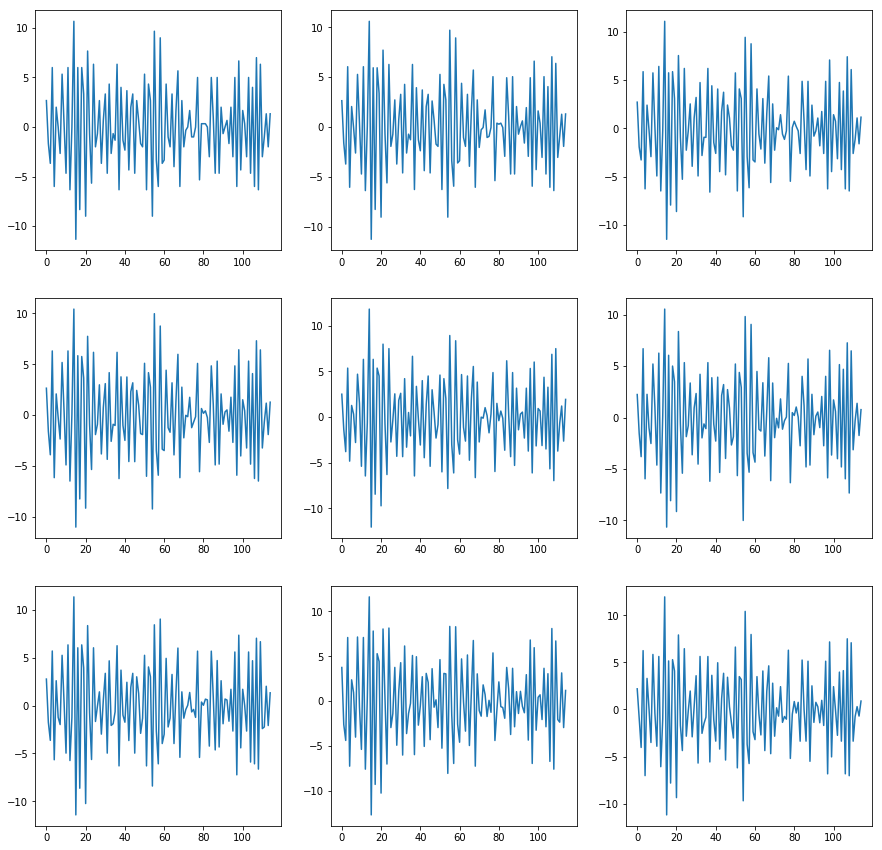

In [36]:
plt.figure(figsize=(15,15))
for i in range(9):
    row=int(i/3)+1
    plt.subplot(3,3,i+1)
    plt.plot(z[i,:])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


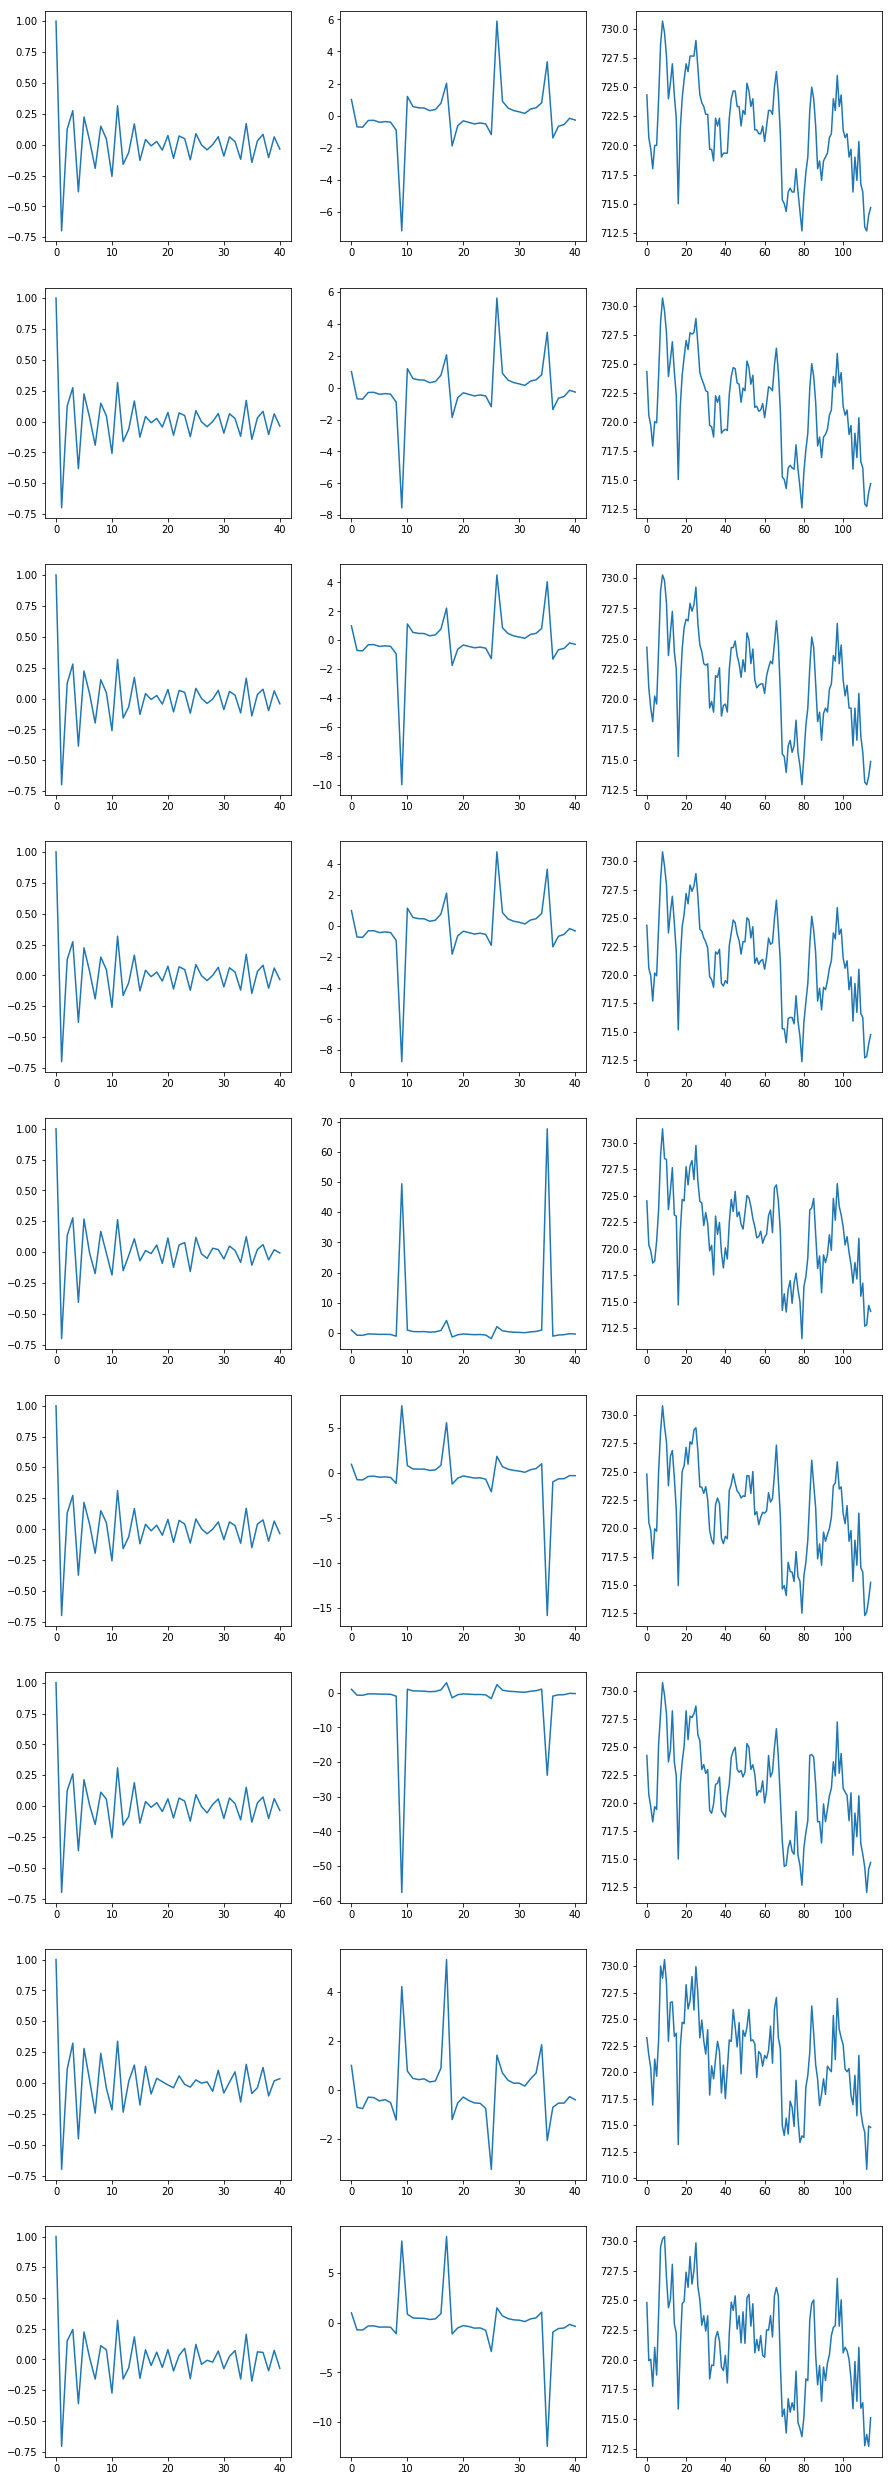

In [37]:
T=data[18,18,18,:]
plt.figure(figsize=(15,45))
for i in range(9):
    plt.subplot(9,3,3*i+1)
    plt.plot(acf(z[i,:]))
    plt.subplot(9,3,3*i+2)
    plt.plot(pacf(z[i,:]))
    plt.subplot(9,3,3*i+3)
    plt.plot(T-z[i,:])
plt.show()

In [22]:
def detect1(m,X,H):
    Model=LinearRegression()
    Model.fit(X,m)
    res=m-Model.predict(X)
    d=res/(1-np.diag(H))
    return(d)

X=design1(n,1)
H=X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
d=detect1(T-z[0,:],X,H)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [30]:
?pacf

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


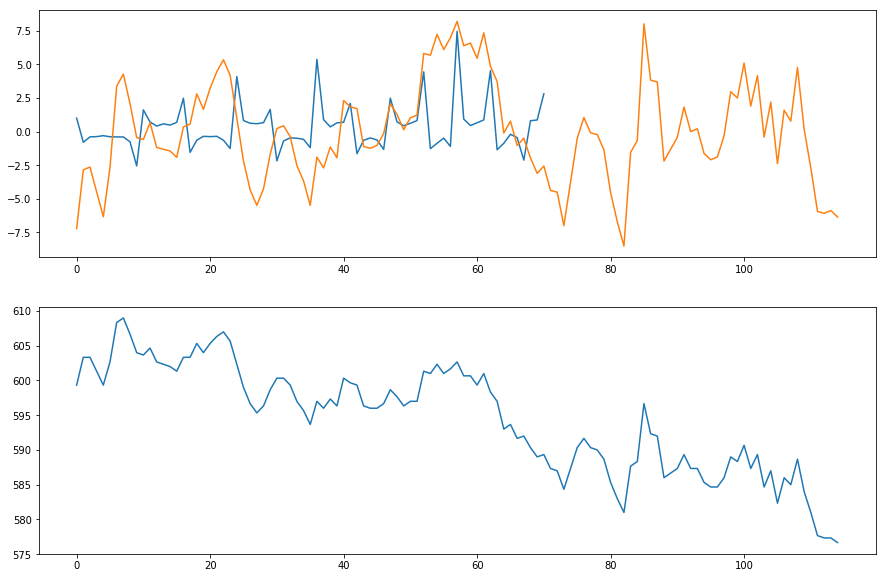

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(pacf(z[0,:],nlags=70),label='Pacf')
plt.plot(d,label='Leverage')
plt.subplot(212)
plt.plot(T-z[0,:])
plt.show()

In [ ]:
def design2(n):
    X=np.zeros(n,2)
    X[:,0]=1
    X[:,1]=range(n)
    return(X)

def linear_detect(X,m):
    Model=LinearRegression()
    Model.fit(X,m)

In [122]:
def clean_dep(z,p):
    n=len(z)
    return(z[1:]-p*z[:(n-1)])

In [44]:
w=5
z2=np.zeros(n)
for i in range(w,n-w):
    z2[i]=np.mean(z1[range(i-w,i+w)])

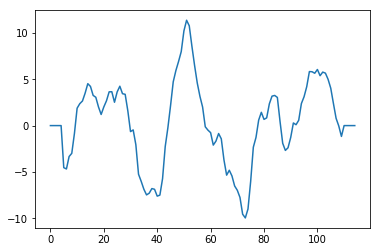

In [45]:
plt.plot(z2)
plt.show()

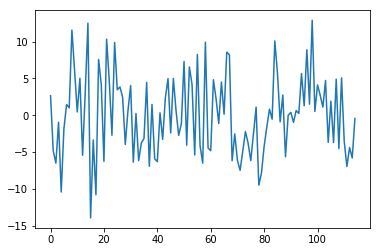

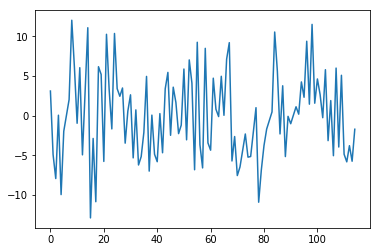

In [165]:
    T_S=T-S[np.array(range(n))%4]
    X=design(n,k)
    z=trend(X,T_S)
    plt.plot(range(n),z)
    plt.show()
    clean(18,18,18,115,3)

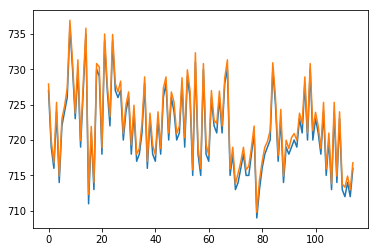

In [122]:
plt.plot(range(n),T,label='Original')
plt.plot(range(n),T_S+1,label='Estimated')
plt.show()

In [48]:
z1[:0]

array([], dtype=float64)